# Import Dependences & Raw Data Set Up

In [1]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
from dateutil.parser import parse 
import matplotlib as mpl
import seaborn as sns

In [3]:
# Alcohol Consumption raw data file to load
file_path = "Data/alcsales_August2020_codedfullfile.csv"

# Read file and store into data frame
alcohol_sales_data = pd.read_csv(file_path)

# Set date/time format
alcohol_sales_data['Month - Year (Date)'] = pd.to_datetime(alcohol_sales_data['Month - Year (Word)'])

# Save updated format to csv
alcohol_sales_data.to_csv(r'Data/alcsales_August2020_codedfullfile_2.csv', index = False)

In [4]:
# Show dataframe head
alcohol_sales_data.head(10)

,Year,Month,FIPS,Beverage,Gallons,Ethanol,Population,PerCapita,State,Month.1,Month - Year (Word),Month - Year (Numeric),Month - Year (Date)
0,2017,1,2,1,103645,42598,593378,0.0718,Alaska,January,January 2017,1 2017,2017-01-01
1,2017,1,5,1,402885,165586,2455022,0.0674,Arkansas,January,January 2017,1 2017,2017-01-01
2,2017,1,8,1,733857,301615,4634346,0.0651,Colorado,January,January 2017,1 2017,2017-01-01
3,2017,1,9,1,412100,169373,3015481,0.0562,Connecticut,January,January 2017,1 2017,2017-01-01
4,2017,1,10,1,180388,74139,799550,0.0927,Delaware,January,January 2017,1 2017,2017-01-01
5,2017,1,12,1,2770686,1138752,17722275,0.0643,Florida,January,January 2017,1 2017,2017-01-01
6,2017,1,17,1,1044642,429348,10556100,0.0407,Illinois,January,January 2017,1 2017,2017-01-01
7,2017,1,20,1,389012,159884,2356231,0.0679,Kansas,January,January 2017,1 2017,2017-01-01
8,2017,1,21,1,779156,320233,3670568,0.0872,Kentucky,January,January 2017,1 2017,2017-01-01
9,2017,1,22,1,633111,260209,3807282,0.0683,Louisiana,January,January 2017,1 2017,2017-01-01


# Aggregate Data From All States Over Time

In [17]:
# Group all states data by month/year/date format
month_date_alcohol_sales_groupby = alcohol_sales_data.groupby(['Month - Year (Date)'])

# Find sum of gallons
month_date_alcohol_sales_groupby_total_gallons = month_date_alcohol_sales_groupby["Gallons"].sum()

# Find sum of ethanol
month_date_alcohol_sales_groupby_total_ethanol = month_date_alcohol_sales_groupby["Ethanol"].sum()

# Find average of population
month_date_alcohol_sales_groupby_total_pop = month_date_alcohol_sales_groupby["Population"].sum()

# Find average pc
month_date_alcohol_sales_groupby_avg_pc = month_date_alcohol_sales_groupby["PerCapita"].mean()

#Create Data Frame
total_alcohol_gallons_over_time_by_date = pd.DataFrame({
    "Gallons": month_date_alcohol_sales_groupby_total_gallons,
    "Ethanol": month_date_alcohol_sales_groupby_total_ethanol,
    "Population": month_date_alcohol_sales_groupby_total_pop,
    "PerCapita": month_date_alcohol_sales_groupby_avg_pc
    
})

#Show head of Data Frame
total_alcohol_gallons_over_time_by_date.head()

,Gallons,Ethanol,Population,PerCapita
Month - Year (Date),,,,
2017-01-01,213428134,17952672,303767158,0.057390
2017-02-01,202554024,17181353,303767158,0.056627
2017-03-01,234341479,19741824,303767158,0.066356
2017-04-01,242022452,19623984,303767158,0.065969
2017-05-01,253716538,20843786,303767158,0.071760


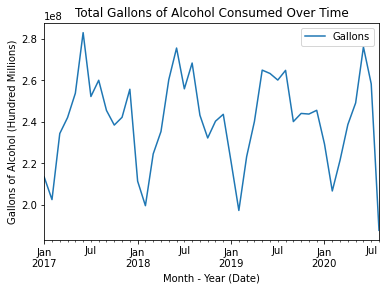

In [18]:
#Plot gallons of alcohol over time for all states
total_alcohol_gallons_over_time_by_date.plot.line( y='Gallons', title="Total Gallons of Alcohol Consumed Over Time")
plt.ylabel('Gallons of Alcohol (Hundred Millions)')

#Save figure to folder
plt.savefig("allstates_alcohol_consumption.png")

# QC - Need to clean the data to remove any states that did not have data for all dates

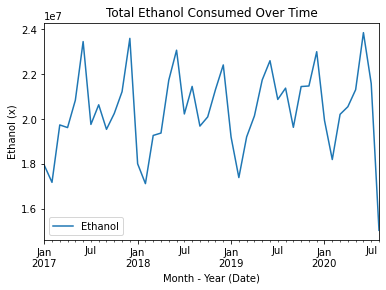

In [20]:
#Plot total ethanol over time for all states
total_alcohol_gallons_over_time_by_date.plot.line( y='Ethanol', title="Total Ethanol Consumed Over Time")
plt.ylabel('Ethanol (x)')

#Save figure to folder
plt.savefig("allstates_ethanol_consumption.png")

# QC - Need to clean the data to remove any states that did not have data for all dates

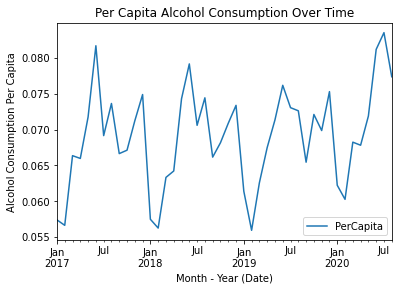

In [21]:
#Plot avg. per capita over time for all states
total_alcohol_gallons_over_time_by_date.plot.line( y='PerCapita', title="Per Capita Alcohol Consumption Over Time")
plt.ylabel('Alcohol Consumption Per Capita')

#Save figure to folder
plt.savefig("allstates_percapita_consumption.png")

# QC - Need to clean the data to remove any states that did not have data for all dates

# State by State Breakdown of Data

In [ ]:
# Set groupby by State
state_alcohol_sales_groupby = alcohol_sales_data.groupby(['State'])

# Find count of data point per state
count_per_state = state_alcohol_sales_groupby.size()

# Find the total ethanol
total_ethanol = state_alcohol_sales_groupby["Gallons"].sum()